### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import folium
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
df = df.set_index('Characteristic')
df = df.loc[['Population, 2016','Total - After-tax income groups in 2015 for the population aged 15 years and over in private households - 100% data'],:]
df


,_id,Category,Topic,Data Source,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
"Population, 2016",3,Population,Population and dwellings,Census Profile 98-316-X2016001,"2,731,571","29,113","23,757","12,054","30,526","27,695",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
Total - After-tax income groups in 2015 for the population aged 15 years and over in private households - 100% data,985,Income,Income of individuals in 2015,Census Profile 98-316-X2016001,"2,294,790","24,995","20,395","10,265","26,305","23,390",...,"14,930","18,580","43,420","10,100","6,680","11,340","10,000","11,175","23,520","12,060"


In [3]:
df = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
df1 = df.set_index('Characteristic')
df1 = df1.loc[['Population, 2016','Total income: Average amount ($)', '            Arabic'],:]
# df1 = df[df['Characteristic']=='Population, 2016']
# df_income = df[df['Characteristic']=='Total - After-tax income groups in 2015 for the population aged 15 years and over in private households - 100% data']
df1
df2 = df1.drop(['_id','Category','Topic','Data Source'], axis=1)
df2
df3 = df2.drop(['City of Toronto'],axis=1)
# for column in df3.columns:
#     df3.at[2, column] = df3.loc[2,column].replace(',','')
#     df3.at[1, column] = column
#     df3[[column]] = df3[[column]].astype(int)

df3.reset_index(drop=True, inplace=True)

df3 = df3.transpose()
df3.reset_index(drop=False, inplace=True)

# drop duplicate columns
df3 = df3.drop([3,4], axis=1)
# df3.head()


df3.columns = ['Neighborhood','Population','Average Income', 'Arabic Speakers']

df3[['Population']] = df3[['Population']].replace(',','', regex=True) 

df3[['Population']] = df3[['Population']].astype(int)

df3[['Average Income']] = df3[['Average Income']].replace(',','', regex=True) 

df3[['Average Income']] = df3[['Average Income']].astype(int)

df3[['Arabic Speakers']] = df3[['Arabic Speakers']].replace(',','', regex=True) 

df3[['Arabic Speakers']] = df3[['Arabic Speakers']].astype(int)

df3




,Neighborhood,Population,Average Income,Arabic Speakers
0,Agincourt North,29113,30414,250
1,Agincourt South-Malvern West,23757,31825,200
2,Alderwood,12054,47709,35
3,Annex,30526,112766,225
4,Banbury-Don Mills,27695,67757,395
...,...,...,...,...
135,Wychwood,14349,54460,50
136,Yonge-Eglinton,11817,89330,85
137,Yonge-St.Clair,12528,114174,80
138,York University Heights,27593,29958,250


In [4]:
api_key = '92d3540c829f42b68ff4e2f25cc65b27'



def get_coordinates(api_key, address, verbose=False):
    try:
        url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(address, api_key)
        response = requests.get(url).json()
#         print(response['results'][0]['geometry'])
        lat = response['results'][0]['geometry']['lat']
        lng = response['results'][0]['geometry']['lng']
        return [lat, lng]
    except:
        return [None, None]
    
    
for i in range(0,df3.shape[0]): 
    address= str(df3.loc[i, 'Neighborhood']).replace(' ','%20')
    address= address + '%2C%20Toronto%2C%20Canada'
    get_coordinates(api_key, address)
    array = get_coordinates(api_key, address)
    df3.loc[i,'lat'] = array[0]
    df3.loc[i,'lng'] = array[1]

df3.info()
# df3[['lat','lng']].dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Neighborhood     140 non-null    object 
 1   Population       140 non-null    int32  
 2   Average Income   140 non-null    int32  
 3   Arabic Speakers  140 non-null    int32  
 4   lat              140 non-null    float64
 5   lng              140 non-null    float64
dtypes: float64(2), int32(3), object(1)
memory usage: 4.4+ KB


In [5]:
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10)
# add markers to map
for lat, lng, neighborhood in zip(df3['lat'], df3['lng'], df3['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

### Foursquare Credentials

In [6]:
# Foursquare credentials
CLIENT_ID = 'JMMVMXC1TXHCBOVV1BRWL12L04NJQ1W4MYIEGL1N5EVDYBLV'
CLIENT_SECRET = 'RLYR54T1V0YWB4QEYRLHCWRSAEJXXGDRBKX5G2P5YJFMUEIJ'
VERSION = '20180604'

In [7]:
# url = 'https://api.foursquare.com/v2/venues/categories&client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
# print(url)
# results = requests.get(url).json()


In [8]:

for i in range(0,len(df3['Neighborhood'])):
    CATEGORY_ID = '4d4b7105d754a06374d81259'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, df3.loc[i,'lat'], df3.loc[i,'lng'], VERSION, CATEGORY_ID, 700)
    results = requests.get(url).json()
    df3.loc[i,'Nearby Restaurants'] = len(results['response']['venues'])

    CATEGORY_ID = '4bf58dd8d48988d115941735'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, df3.loc[i,'lat'], df3.loc[i,'lng'], VERSION, CATEGORY_ID, 700)
    results = requests.get(url).json()
    df3.loc[i,'Nearby Middle Eastern'] = len(results['response']['venues'])

    # print(url)
    # len(results['response']['venues'])#[0]
df3

,Neighborhood,Population,Average Income,Arabic Speakers,lat,lng,Nearby Restaurants,Nearby Middle Eastern
0,Agincourt North,29113,30414,250,43.808038,-79.266439,27.0,1.0
1,Agincourt South-Malvern West,23757,31825,200,43.663280,-79.466170,28.0,1.0
2,Alderwood,12054,47709,35,43.601717,-79.545232,27.0,0.0
3,Annex,30526,112766,225,43.670338,-79.407117,30.0,9.0
4,Banbury-Don Mills,27695,67757,395,43.734804,-79.357243,11.0,0.0
...,...,...,...,...,...,...,...,...
135,Wychwood,14349,54460,50,43.682122,-79.423839,30.0,5.0
136,Yonge-Eglinton,11817,89330,85,43.706748,-79.398327,30.0,9.0
137,Yonge-St.Clair,12528,114174,80,43.688078,-79.394396,29.0,1.0
138,York University Heights,27593,29958,250,43.758781,-79.519434,29.0,1.0


In [9]:
df3[['Nearby Middle Eastern']] = df3[['Nearby Middle Eastern']].astype(int)
df3[['Nearby Restaurants']] = df3[['Nearby Restaurants']].astype(int)

df3[['Arabic Speakers','Nearby Middle Eastern', 'Nearby Restaurants']].describe()

,Arabic Speakers,Nearby Middle Eastern,Nearby Restaurants
count,140.000000,140.000000,140.000000
mean,212.928571,1.878571,23.992857
std,268.502365,4.065061,7.529794
min,10.000000,0.000000,2.000000
25%,53.750000,0.000000,22.500000
50%,115.000000,0.000000,26.000000
75%,217.500000,2.000000,29.250000
max,1310.000000,27.000000,30.000000


In [10]:
# set number of clusters
kclusters = 5

df_clustering = df3[['Population', 'Arabic Speakers', 'Average Income']]

from sklearn import preprocessing
# Get column names first
names = df_clustering.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_clustering)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scaled_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 4, 0, 1, 3, 0, 1, 4])

### insert the cluster labels

In [11]:
df3.insert(0, 'Cluster Labels', kmeans.labels_)


### map the clustered neighborhoods

In [12]:
# import matplotlib cm and colors
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df3['lat'], df3['lng'], df3['Neighborhood'], df3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [13]:
# describe cluster labels 
# df3.loc[df3['Cluster Labels'] == 0, :].describe() #high pop 42k AR244
df3.loc[df3['Cluster Labels'] == 1, :].describe() #low pop 45k AR88
df3.loc[df3['Cluster Labels'] == 2, :].describe() #low pop  210k AR71
df3.loc[df3['Cluster Labels'] == 3, :].describe() #high pop 40k AR911
# df3.loc[df3['Cluster Labels'] == 4, :].describe() #low pop 106k AR81
# pick a certain cluster
# df3.loc[df3['Cluster Labels'] == 3, :]
# The best 2 clusters seem to be clusters labeled 2 & 3.
# cluster 2 has low arab and total population but a high average income
# cluster 3 has a high arab and total population but a low average income
# now business knowledge comes into play; how high end is the restaurant going to be?
# let's say we want our restaurant to be a fast casual restaurant, then we will chooses cluster 3 since there is a 
# higher general and arab population

,Cluster Labels,Population,Average Income,Arabic Speakers,lat,lng,Nearby Restaurants,Nearby Middle Eastern
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,3.0,34689.857143,40153.214286,911.785714,43.727649,-79.370828,24.500000,2.785714
std,0.0,14853.440745,12383.395869,235.270770,0.046068,0.078400,6.641941,7.073010
min,3.0,15723.000000,26548.000000,470.000000,43.648795,-79.549000,9.000000,0.000000
25%,3.0,25201.500000,31725.500000,742.500000,43.700110,-79.416300,23.750000,0.000000
50%,3.0,30435.500000,36072.500000,910.000000,43.718605,-79.371126,26.000000,0.500000
75%,3.0,43986.000000,44623.500000,1088.750000,43.761088,-79.319744,29.750000,2.000000
max,3.0,65913.000000,70600.000000,1310.000000,43.799003,-79.225291,30.000000,27.000000


### importing matplotlib

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


In [15]:
chosen_cluster = df3.loc[df3['Cluster Labels'] == 3, :]
chosen_cluster = chosen_cluster.set_index('Neighborhood')
chosen_cluster

,Cluster Labels,Population,Average Income,Arabic Speakers,lat,lng,Nearby Restaurants,Nearby Middle Eastern
Neighborhood,,,,,,,,
Bay Street Corridor,3,25797,56526,1070,43.665272,-79.387531,30,27
Don Valley Village,3,27051,37379,730,43.792673,-79.354722,27,0
Dorset Park,3,25003,31692,780,43.752847,-79.282067,30,0
Henry Farm,3,15723,36359,780,43.769509,-79.354296,13,1
Islington-City Centre West,3,43965,52787,665,43.648795,-79.549000,9,0
L'Amoreaux,3,43993,31826,945,43.799003,-79.305967,23,1
Mount Olive-Silverstone-Jamestown,3,32954,26548,1310,43.700110,-79.416300,26,0
Parkwoods-Donalda,3,34805,42516,1210,43.700110,-79.416300,26,0
Thorncliffe Park,3,21108,28875,725,43.704553,-79.345407,30,2


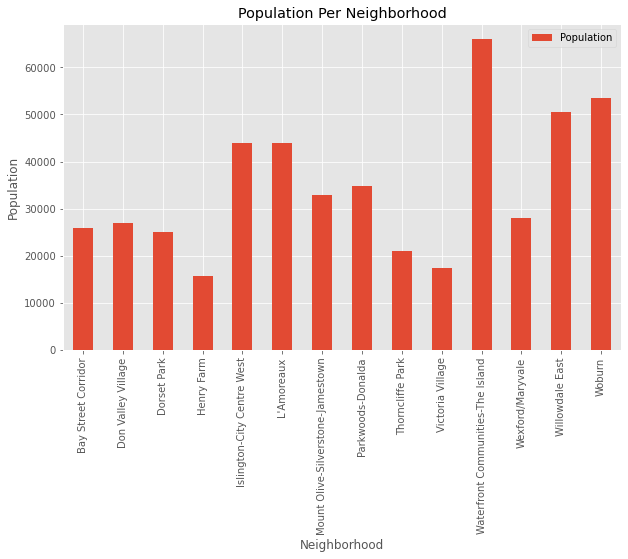

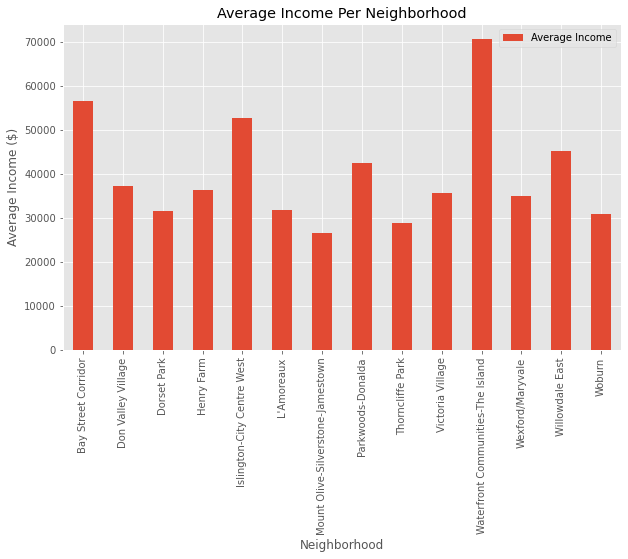

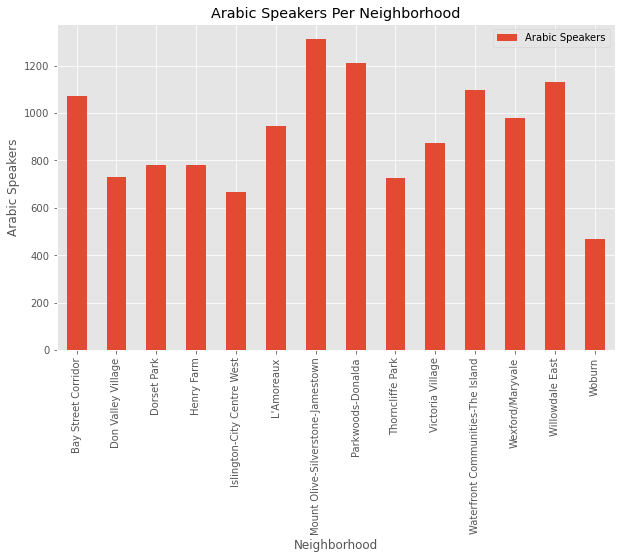

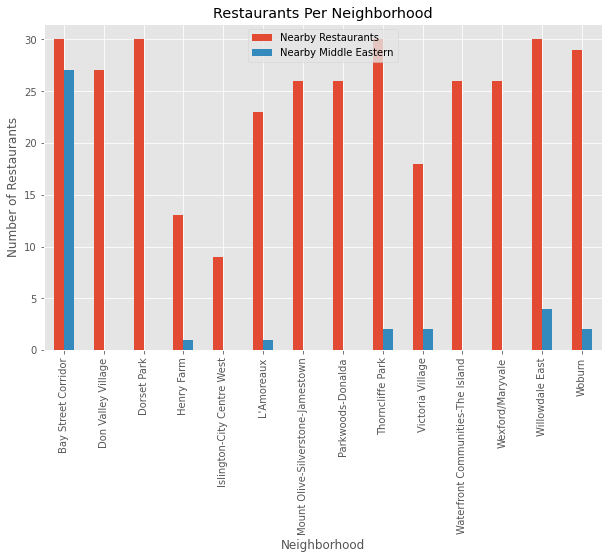

In [16]:
# step 2: plot data
chosen_cluster[['Population']].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population Per Neighborhood') # add title to the plot

# plt.show()

### ---------------------------------------------------------------------------------- ###
chosen_cluster[['Average Income']].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Average Income ($)') # add y-label to the plot
plt.title('Average Income Per Neighborhood') # add title to the plot

plt.show()

### ---------------------------------------------------------------------------------- ###
chosen_cluster[['Arabic Speakers']].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Arabic Speakers') # add y-label to the plot
plt.title('Arabic Speakers Per Neighborhood') # add title to the plot

plt.show()

# ### ---------------------------------------------------------------------------------- ###
chosen_cluster[['Nearby Restaurants','Nearby Middle Eastern']].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Restaurants') # add y-label to the plot
plt.title('Restaurants Per Neighborhood') # add title to the plot

plt.show()

Judging by the characteristics in all 4 graphs, the first choice would definitely be **Waterfront Communtities-The Island**
Lets look the the stats for **Waterfront Communtities-The Island**:
Arabic Speakers: top 4 out of 14 neighborhoods
Nearby Restaurants: Average Amount
Middle Eastern Restaurants: zero
Average Income: Top out of 14 neighborhoods
Population: Top out of 14 neighborhoods

